<a href="https://colab.research.google.com/github/CarlosQuark/Machine-Learning-Astrophysics/blob/main/Clase_de_Redes_Neuronales(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#El maestro nos recomenda una página llamada Keras
import pandas as pd
import random
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical

import matplotlib.pyplot as plt





In [8]:
#Corremos el dataset

dataset = pd.read_csv("transactions.csv")
dataset.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [9]:
#Información adicional del dataset.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB




1.   Iloc es un atributo de pandas para seleccionar filas y columnas.
2.   [:] , es para seleccionar todas las filas del dataframe.
3. [0:7] quiere decir que se selecciona la fila de la columna 0 hasta $i-1$ de columnas.


In [11]:
X = dataset.iloc[:, 0:7]
y = dataset.iloc[:,7]

In [12]:
""" Entrenamos la sala de los datos para cada una de ellas.

    Almacenamos las variables de entrenamiento y prueba. (Conjuntos)

    Separamos el conjunto de datos de prubea en el 20%

"""

xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, stratify=y)

In [13]:

scaler = MinMaxScaler().fit(xtrain)

xtrain_std = scaler.transform(xtrain)

xtest_std = scaler.transform(xtest)


In [14]:

"""Este apartado se utilizar para poder dar inicio el entrenamiento a una red
neuronal

   Todo esto viene dentro de la página oficial de Keras.

   Dense es una capa de neurona que está conectada con todas las anteriores

   Sequential es utilizado para crear secuencias en redes neuronales.

   Optimizador: Adam.

   units es la candtidad de clases que tienes.

   activation: "Qué tipo de función de activación almacenas".

   input_dim = la dimensionalidad.

"""
network = Sequential([

    Dense(units=2, activation= "softmax" , input_dim = 7)
])

#Que copilador voy a utilizar, Adam, puede hacer eso.



Adam(learning_rate=0.01) #Taza de aprendizaje pequeña

network.compile()


#Función de perdida que se utilizará en la sala de entrenamient como su métrica.

network.compile(loss= "categorical_crossentropy", metrics=["accuracy"])


In [15]:
"""La libreria de keras para to_categorical

   se utiliza para poder experesar problemas de clasificación de multiclase.
   Para convertir nuestras etiquetas númericas en tipo one-hot.

   Supongamso que tienes 3 clases (etiqeutas númericas 0,1,2)

   En la primera linea convierte la una matriz en one-hot

   Cada fila corresponde a un etiqueta, y cada columna, representa una clase.

   AQUÍ INICIAMOS LA ETAPA DE ENTRENAMIENTO DE LA RED

   El profe explica que es el batch_size, es para reducir el costo computacional,
   crea grupos para filas de hasta 100,000 dimensiones.

"""

#network.fit(xtrain_std, ytrain, epochs=50, batch_size=128 )


ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

epoch_accuracy =network.fit(xtrain_std, ytrain, epochs=20, batch_size=128,
                             validation_data=(xtest_std,ytest))



Epoch 1/20
6250/6250 [==============================] - 13s 2ms/step - loss: 0.2796 - accuracy: 0.9024 - val_loss: 0.2460 - val_accuracy: 0.9128
Epoch 2/20
6250/6250 [==============================] - 12s 2ms/step - loss: 0.2379 - accuracy: 0.9132 - val_loss: 0.2298 - val_accuracy: 0.9137
Epoch 3/20
6250/6250 [==============================] - 12s 2ms/step - loss: 0.2231 - accuracy: 0.9146 - val_loss: 0.2163 - val_accuracy: 0.9157
Epoch 4/20
6250/6250 [==============================] - 12s 2ms/step - loss: 0.2107 - accuracy: 0.9169 - val_loss: 0.2049 - val_accuracy: 0.9180
Epoch 5/20
6250/6250 [==============================] - 13s 2ms/step - loss: 0.2003 - accuracy: 0.9195 - val_loss: 0.1953 - val_accuracy: 0.9205
Epoch 6/20
6250/6250 [==============================] - 13s 2ms/step - loss: 0.1915 - accuracy: 0.9222 - val_loss: 0.1871 - val_accuracy: 0.9236
Epoch 7/20
6250/6250 [==============================] - 12s 2ms/step - loss: 0.1841 - accuracy: 0.9248 - val_loss: 0.1803 - val_ac

In [16]:
#Valores de predicción

yhat = network.predict(xtest_std)

6250/6250 [==============================] - 9s 1ms/step


In [17]:
"""
    Creamos un matriz de predicciones, para saber como se comportan nuestros
    valores.

    """
print(yhat.shape)

(200000, 2)


In [18]:
"""

   argmax es una función de Numpy que se utliza para poder encontrar el valor
   máximo, lo que hacemos es convertir los valores de predicción en
   una representación de probabilidad, o es 0 o 1.

   Se están conviritiendo las probabilidad en un valor único.

"""
yhat =np.argmax(yhat, axis = -1)
ytest = np.argmax(ytest, axis= -1)

In [20]:
precision = accuracy_score(ytest, yhat)

cm = confusion_matrix(ytest, yhat)

print(f"La precisión de los datos fue de {precision}")

print(cm)

La precisión de los datos fue de 0.945115
[[181746    773]
 [ 10204   7277]]


Text(0, 0.5, 'Accuracy')

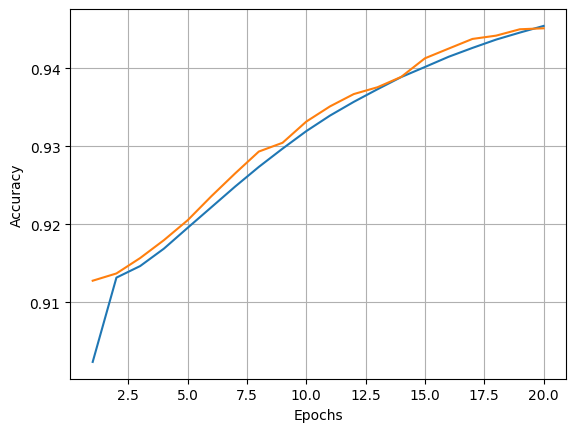

In [22]:
#Función logarítimica

epocas = list(range(1,21,1))

plt.figure(1)


plt.plot(epocas, epoch_accuracy.history["accuracy"])


plt.plot(epocas, epoch_accuracy.history["val_accuracy"])


plt.grid()

plt.xlabel("Epochs")

plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

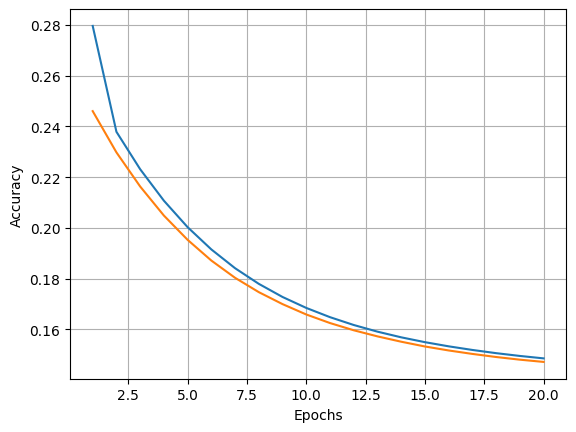

In [23]:
epocas = list(range(1,21,1))

plt.figure(1)


plt.plot(epocas, epoch_accuracy.history["loss"])


plt.plot(epocas, epoch_accuracy.history["val_loss"])

plt.grid()

plt.xlabel("Epochs")

plt.ylabel("Accuracy")
